# Lab 8: Hypotheses

## Your Name: Caroline Petersen

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

# style
# plt.style.use('fivethirtyeight')
plt.style.use("ggplot")

## 1. Sampling

Let's start by loading a data frame the *mimics* a population of 50,000 American adults.  It contains a row for each individual with gender (male and female only), ethnicity, marital status, and income class (lower, middle, or upper only).

Each columns was randomly generated with similar proportions to the US population, *but correlations were not preserved*.  (So, for instance, although we expect ethnicities to distribute differently into income classes in the real world, this is not the case in this fake data frame.)

In [68]:
adult_pop = pd.read_csv("adult_pop.csv")
adult_pop

,Gender,Ethnicity,Married,Income
0,F,Hisp,Single,Lower
1,F,Black,Single,Lower
2,F,White,Married,Lower
3,M,Hisp,Single,Middle
4,M,Hisp,Married,Lower
...,...,...,...,...
49995,M,White,Married,Middle
49996,M,Hisp,Married,Middle
49997,M,Hisp,Married,Upper
49998,F,Black,Married,Middle


**Question 1.1:** Find the total population on data frame and save it in the variable `total_pop` (which we can use later.)

In [69]:
total_pop = len(adult_pop)
total_pop

50000

**Question 1.2:** Find the total number of Asian individuals and its proportion in the adult population (of `adult_pop`):

In [70]:
total_asian = adult_pop['Ethnicity'].value_counts()['Asian']
asian_perc = total_asian / total_pop
asian_perc

0.06062

**Question 1.3:** Let's automate this process.  Write a function `column_proportions` that takes a data frame and column as the input, and returns a data frame with three columns:
- "Value": contains the values that appear in the selected column.
- "Total": contains the number of occurrences of the value in the data frame's column *in increasing order*.
- "Proportion": contains the proportion of that particular value in the data frame's column.

*Hints:* 

1. `groupby` can help create the first two columns.  It will give a *series*, rather than a data frame, with the values as index.  
2. You will need to convert it to a data frame (you can use `to_frame` for that) and change the columns names.  
3. Then, you will need to sort and add the extra third column.

In [71]:
def column_proportions(df, col_name):
    """Given a data frame and name of a column, produce a new data frame with values, 
    number of occurrences, and  for each value."""
    # number of rows of data frame
    size = len(df)
    
    # create the data frame with the first two columns
    res = df.groupby(col_name).size().to_frame()
    
    # make index into a column:
    res.reset_index(inplace=True)
    
    # rename the columns
    res.rename(columns={col_name: "Value", 0: "Total"}, inplace=True)
    
    # add Proportions column
    res["Proportion"] = res["Total"] / size

    # sort by total in increasing order (and fix the index)
    res = res.sort_values("Total")
    
    # reset index dropping old
    res = res.reset_index(drop=True)
    
    return res

Run the cells below to check.  (The values resemble the actual values of the US adult population.)

In [72]:
column_proportions(adult_pop, "Ethnicity")

,Value,Total,Proportion
0,Other,1046,0.02092
1,Asian,3031,0.06062
2,Black,7020,0.14040
3,Hisp,9550,0.19100
4,White,29353,0.58706


In [73]:
column_proportions(adult_pop, "Income")

,Value,Total,Proportion
0,Upper,10422,0.20844
1,Lower,14587,0.29174
2,Middle,24991,0.49982


In [74]:
column_proportions(adult_pop, "Married")

,Value,Total,Proportion
0,Single,19091,0.38182
1,Married,30909,0.61818


In [75]:
column_proportions(adult_pop, "Gender")

,Value,Total,Proportion
0,F,24950,0.499
1,M,25050,0.501


**Question 1.4:** Create samples from `adult_pop` (*with replacement*) of sizes 10, 100, and 1000.  Remember to reset and drop the index.

In [76]:
# sample of 10
sample_10 = adult_pop.sample(10, replace=True).reset_index(drop=True)

# sample of 100
sample_100 = adult_pop.sample(100, replace=True).reset_index(drop=True)

# sample of 1000
sample_1000 = adult_pop.sample(1000, replace=True).reset_index(drop=True)

Run the cells below to test the results.

In [77]:
sample_10

,Gender,Ethnicity,Married,Income
0,M,Black,Married,Lower
1,M,White,Married,Upper
2,F,Black,Married,Middle
3,F,White,Married,Upper
4,M,White,Single,Middle
5,F,White,Married,Middle
6,F,Black,Married,Middle
7,F,White,Single,Upper
8,F,White,Married,Lower
9,F,White,Single,Middle


In [78]:
sample_100

,Gender,Ethnicity,Married,Income
0,M,Hisp,Married,Middle
1,M,White,Single,Lower
2,M,Hisp,Married,Lower
3,M,Hisp,Married,Middle
4,M,White,Single,Lower
...,...,...,...,...
95,M,Hisp,Married,Upper
96,F,White,Single,Middle
97,M,Black,Married,Lower
98,M,White,Married,Middle


In [79]:
sample_1000

,Gender,Ethnicity,Married,Income
0,F,White,Married,Middle
1,F,Hisp,Single,Lower
2,F,Hisp,Single,Upper
3,M,White,Married,Lower
4,M,Asian,Married,Middle
...,...,...,...,...
995,M,Hisp,Married,Upper
996,F,Hisp,Married,Middle
997,M,White,Single,Lower
998,F,White,Married,Middle


**Question 1.5:** Create a data frame with five columns:
* `Ethnicity`, containing the possible ethnicities from `adult_pop` **in alphabetical order**;
* `Sample 10`, with proportions for each ethnicity from `sample_10`;
* `Sample 100`, with proportions for each ethnicity from `sample_100`;
* `Sample 1000`, with proportions for each ethnicity from `sample_1000`;
* `Total Population`, with proportions for each ethnicity from `adult_pop`.

*The columns must be in the order above!*

*Hint:* 
1. Use the function `column_proportions` to generate the proportions (for each `adult_pop`, `sample_10`, `sample_100`, and `sample_1000`).
2. Select only `Value` and `Proportion` for each data frame.
3. Rename the columns appropriately.
4. Merge the data frames, setting `NaN` to zero.  (You will need to use the `merge` method multiple times!)
5. When merging the data frames, *start with the one for the total population* and use the `merge` option `how="left"`, to avoid dropping rows (if some data frame is missing some ethnicity).
6. Reorder the columns if necessary.
7. Don't forget to sort the rows (resetting and dropping the index).

In [80]:
# ethnicity proportion of total population
# (with correct column names: "Ethniticty" and "Total Population")
total_pop_prop = column_proportions(adult_pop, "Ethnicity")[
    ["Value", "Proportion"]
].rename(columns={"Value": "Ethnicity", "Proportion": "Total Population"})

# ethnicity proportion of sample_10
# (with correct column names: "Ethniticty" and "Sample 10")
sample_10_prop = column_proportions(sample_10, "Ethnicity")[
    ["Value", "Proportion"]
].rename(columns={"Value": "Ethnicity", "Proportion": "Sample 10"})

# ethnicity proportion of sample_100
# (with correct column names: "Ethniticty" and "Sample 100")
sample_100_prop = column_proportions(sample_100, "Ethnicity")[
    ["Value", "Proportion"]
].rename(columns={"Value": "Ethnicity", "Proportion": "Sample 100"})

# ethnicity proportion of sample_1000
# (with correct column names: "Ethniticty" and "Sample 1000")
sample_1000_prop = column_proportions(sample_1000, "Ethnicity")[
    ["Value", "Proportion"]
].rename(columns={"Value": "Ethnicity", "Proportion": "Sample 1000"})

# merge all proporiton data frames (matching the "Ethnicity" column)
# and setting NaN to zero
ethnicity_props = (
    total_pop_prop.merge(sample_10_prop, how="left")
    .fillna(0)
    .merge(sample_100_prop)
    .fillna(0)
    .merge(sample_1000_prop)
    .fillna(0)
    .sort_values("Ethnicity")
)

# sort rows with Ethnicity in alphabetical order
ethnicity_props = ethnicity_props.sort_values("Ethnicity").reset_index(drop=True)


# reorder columns to required order
ethnicity_props = ethnicity_props[
    ["Ethnicity", "Sample 10", "Sample 100", "Sample 1000", "Total Population"]
]

ethnicity_props

,Ethnicity,Sample 10,Sample 100,Sample 1000,Total Population
0,Asian,0.0,0.05,0.052,0.06062
1,Black,0.3,0.15,0.148,0.14040
2,Hisp,0.0,0.24,0.195,0.19100
3,Other,0.0,0.03,0.025,0.02092
4,White,0.7,0.53,0.580,0.58706


**Question 1.6:** Draw a (horizontal) bar graph comparing the percentages from the total population and samples of sizes 10, 100, and 1000.

*Hint:* Use `ethnicity_props`.

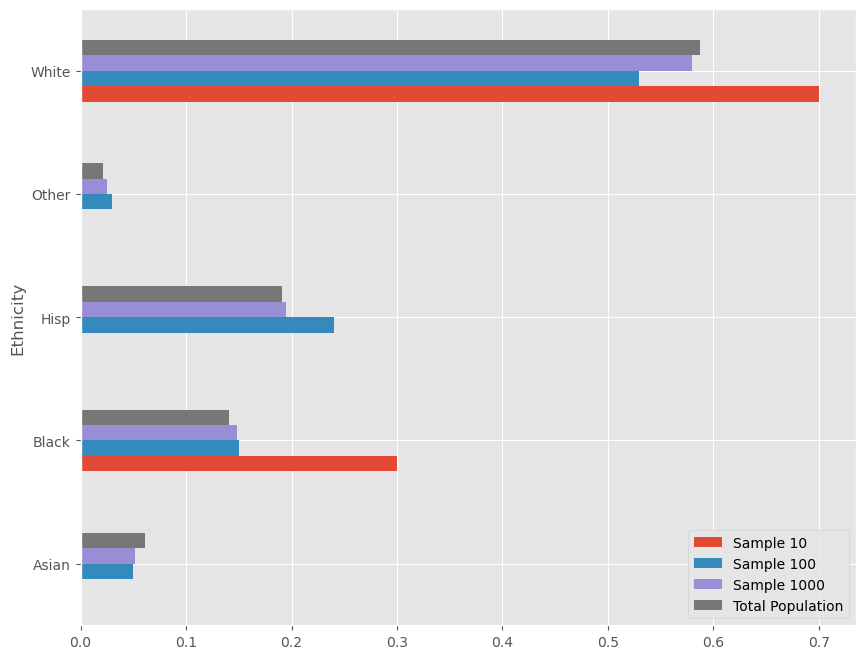

In [81]:
ethnicity_props.plot("Ethnicity", kind="barh")
plt.show()

**Question 1.7:** `sample_1000` should be a fairly close representation of the real total population.  Compute the absolute value of the differences between the **percentage** (in %) of male, single, hispanic in `sample_1000` and `adult_pop`:

In [82]:
# total number of male, single, hispanic individuals in sample_1000
male_single_hisp_sample_1000 = len(
    sample_1000.query("Gender == 'M' and Ethnicity == 'Hisp' and Married == 'Single'")
)

# percentage of male, single, hispanic individuals in sample_1000
male_single_hisp_sample_1000_perc = (
    100 * male_single_hisp_sample_1000 / len(sample_1000)
)

# total number of male, single, hispanic individuals in adult_pop
male_single_hisp_adult_pop = len(
    adult_pop.query("Gender == 'M' and Ethnicity == 'Hisp' and Married == 'Single'")
)

# percentage of male, single, hispanic individuals in adult_pop
male_single_hisp_adult_pop_perc = 100 * male_single_hisp_adult_pop / len(adult_pop)

# absolute value of the difference in the percentages
male_single_hisp_diff = np.abs(
    male_single_hisp_sample_1000_perc - male_single_hisp_adult_pop_perc
)

male_single_hisp_diff

0.9940000000000002

## 2. Females from Lower Income Class

**Question 2.1:**  Find the percentage of female from the lower income class in `adult_pop`:

In [90]:
total_fem_lower_class = len(adult_pop.query("Gender == 'F' and Income == 'Lower'"))
perc_fem_lower_class = total_fem_lower_class / total_pop
perc_fem_lower_class

0.1446

**Question 2.2:** Write a function that takes a data frame with the same columns as `adult_pop` and gives the total number of females from the lower income class in the data frame.

In [91]:
def female_lower_income(df):
    """
    Get the total number of females in the lower income class of the given data frame.
    """
    return len(df.query("Gender == 'F' and Income == 'Lower'"))

Run the cells below to test the results.

In [92]:
female_lower_income(adult_pop)

7230

In [93]:
female_lower_income(sample_10)

1

In [94]:
female_lower_income(sample_100)

17

In [95]:
female_lower_income(sample_1000)

131

**Question 2.3:** Create a histogram of number of females from lower income class from 10,000 random samples of 100 people from the total population.

*Hint:* Use the `female_lower_income` function.

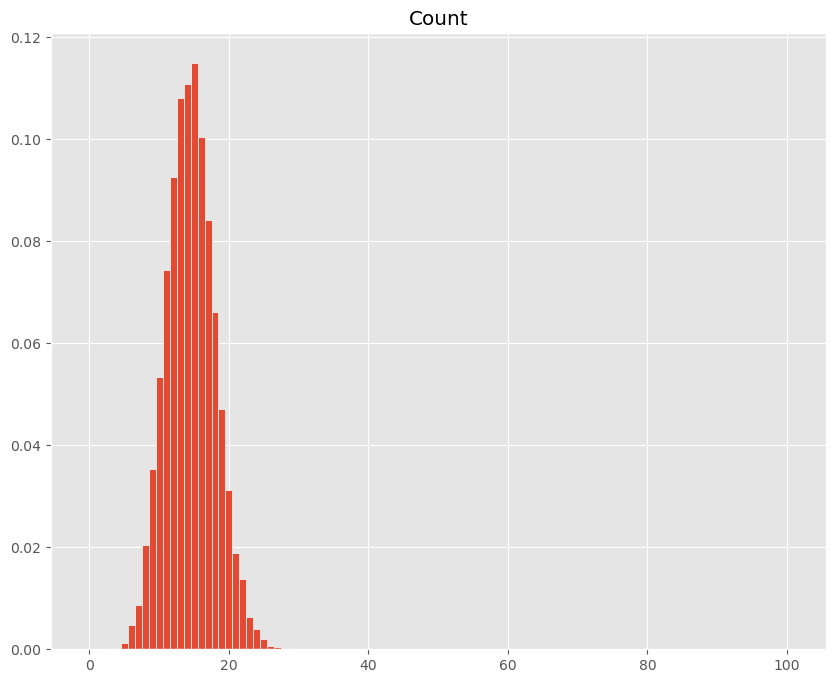

In [97]:
# number of samples
num_samples = 10_000

# initialize the array that will contain the number of
# females from lower income class in samples
numbers = np.zeros(num_samples)

# add the values to the array
for i in np.arange(num_samples):
    numbers[i] = female_lower_income(adult_pop.sample(100, replace=True))

# create a data frame with the resutls
samples_df = pd.DataFrame({"Count": numbers})

# create the histogram
samples_df.hist("Count", bins=np.arange(-0.5, 101.5, 1), ec="white", density=True)

plt.show()

**Question 2.4:** Using `samples_df` (from the previous question) to give the empirical probability distribution of samples of 100 individuals from `adult_pop`, find the p-values for having 10 and 21 women from lower income class in a panel of a supposedly random sample of 100 individuals from the adult population.

*Hint:* The histogram above can help on deciding how to compute these p-values.  (Remember that the *p-value* of a test is the chance that the test statistic will be equal to the observed value in the sample *or even further in the direction that supports the alternative hypothesis*.)  The alternative hypothesis here is simply that the null-hypothesis (that the 100 individuals were randomly chosen) is false.  We thus could have either too many or too few females from the lower income class.

In [100]:
p_val_10 = len(samples_df.loc[samples_df["Count"] <= 10]) / len(samples_df)
p_val_10

0.1239

In [101]:
p_val_21 = len(samples_df.loc[samples_df["Count"] >= 21]) / len(samples_df)
p_val_21

0.0462

### Quantiles

Remember that a test is *statistically significant* if its p-value is less than 5%, and it is *highly statistically significant* if its p-value is less than 1%.  To find what are the boundaries for those p-values, we can use [NumPy's quantile](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html) (or [Panda's](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html)).

For instance, to find the number of females from the lower income class such that any less would be statistically significant, we can do:

In [102]:
samples_df["Count"].quantile(0.05)

9.0

And for *highly* statistically significant:

In [103]:
samples_df["Count"].quantile(0.01)

7.0

**Question 2.5:** On the other hand, some tests might be statistically significant for having too many females from the lower income class.  Find values for which a higher number would be statistically significant and highly statistically significant.

In [113]:
# statistically significant
stat_sig = samples_df["Count"].quantile(0.95)
stat_sig

20.0

In [114]:
# highly statistically significant
highly_stat_sig = samples_df["Count"].quantile(0.99)
highly_stat_sig

23.0

## 3. Total Variation Distance

Suppose you have a panel of 100 people with the following proportions on income:

In [104]:
panel_income = pd.DataFrame(
    {
        "Income": np.array(["Lower", "Middle", "Upper"]),
        "Proportion": np.array([0.22, 0.54, 0.24]),
    }
)
panel_income

,Income,Proportion
0,Lower,0.22
1,Middle,0.54
2,Upper,0.24


Remember that we can find the populations proportions (sorting to match `panel_income`):

In [105]:
pop_income = (
    column_proportions(adult_pop, "Income").sort_values("Value").reset_index(drop=True)
)
pop_income

,Value,Total,Proportion
0,Lower,14587,0.29174
1,Middle,24991,0.49982
2,Upper,10422,0.20844


**Question 3.1:** Compute the total variation distance (TVD) of the *percentages* of income classes between the total population (`pop_income`) and the panel above (`panel_income`).

*Hint:* 
1. **You cannot enter the values by hand!**  You need to use the `pop_income` and `panel_income` variables to get the TVD.
2. Note we are asking for *percentages*, and not proportions.

In [106]:
panel_tvd = (
    100 * np.sum(np.abs(panel_income["Proportion"] - pop_income["Proportion"])) / 2
)
panel_tvd

7.174000000000003

**Question 3.2:** Create an array `tvd_values` with the TVDs for the percentage of each income class between each of 10,000 samples of 100 people selected from `adult_pop` and `adult_pop` itself.

*Hint:* 
- Use `column_proportions` to get the proportions from the sample.
- Again, careful with order of rows!  (Sort as done with `pop_income` above!)

In [108]:
# number of samples
number_of_samples = 10_000

# percentages from adult_pop (sorted!)
pop_income_perc = 100 * pop_income.sort_values("Value")["Proportion"]

# initialize array of TVDs
tvd_values = np.zeros(number_of_samples)

for i in np.arange(number_of_samples):
    # percentages for the sample (sorted!)
    sample_income_perc = 100 * column_proportions(
        adult_pop.sample(100), "Income"
    ).sort_values("Value").reset_index(drop=True)["Proportion"]

    # tvd between sample and total population
    tvd = np.sum(np.abs(pop_income_perc - sample_income_perc)) / 2
    
    # add tvd to the array tvd_values
    tvd_values[i] = tvd

# first 20 entries of tvd_values
tvd_values[:20]

array([ 6.982, 12.156,  5.844,  2.844,  2.156,  5.982,  0.982,  8.826,
        8.982,  5.174,  2.156,  5.018,  4.174,  3.018,  5.826,  5.156,
        4.156,  1.982,  5.174,  5.982])

Below we draw the histogram for the TVD values found from the 10,000 sample.  In green, we mark the one found for the panel above.

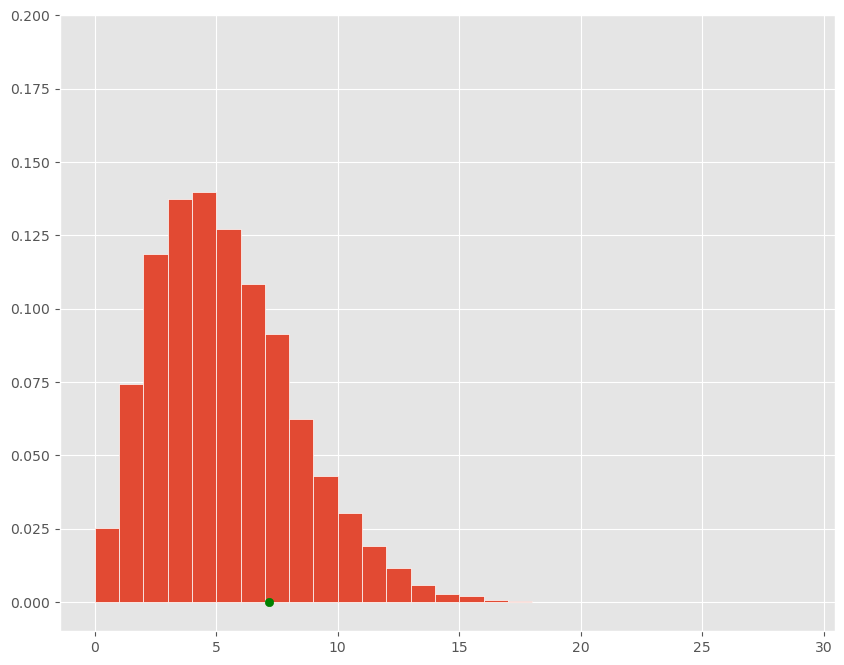

In [109]:
plt.hist(tvd_values,  bins = np.arange(0, 30, 1), density=True, ec="white")
plt.scatter(panel_tvd, 0, color="green")
plt.ylim(-0.01, 0.2)
plt.show()

**Question 3.3:**  Using the histogram for `tvd_values` as our empirical probability distribution, what is the p-value for the TVD between`panel_income` and `pop_income` (computed in `panel_tvd`)?

*Hint:* You've done that in a previous question where the data was in a data frame.  Here the data in an array.  You could put the array in a data frame, but it is easier than that!

For instance, if I wanted to count the number of `5`'s in an array `a`, I can simply do:

```python
np.count_nonzero(a == 5)
```

You can use a similar idea for other tests with the array.

In [111]:
panel_p_val = np.count_nonzero(tvd_values > panel_tvd) / len(tvd_values)
panel_p_val

0.2182

**Question 3.4:** What is the largest value for a TVD between a test and `pop_income` still statistically *insignificant*?

In [112]:
largest_stat_ins = np.quantile(tvd_values, 0.95)
largest_stat_ins

10.825999999999999

## 4. Submission

You're finished with lab 8. **To submit this lab**, please download your notebook as a .ipynb file and submit in Canvas under Lab 8 (under Assignments). To export, go to the toolbar at the top of this page, click File > Download. Then, go to our class's Canvas page and upload your file under "Lab 8".

For easy identification, **please add your surname to the file**, as in: lab_08_DS201_Name.ipynb